# Global Health Statistics

In [3]:
import pandas as pd

In [4]:
file_path = r"D:\Python\Global Health Statistics\Global Health Statistics.csv"

In [5]:
df = pd.read_csv(file_path)

In [6]:
# Información General del set de datos
print(df.info())
print(df.describe())
print(df.head())
print(df.columns)
print(df.isnull().sum())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

In [8]:
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


In [9]:
# Exploración Inicial del Dataset
print(f"Number of Unique Disease Categories: {df['Disease Category'].nunique()}")
print(f"Number of Age Groups: {df['Age Group'].nunique()}")
print(f"Number of Gender Categories: {df['Gender'].nunique()}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Year Range: {df['Year'].min()} - {df['Year'].max()}")

Number of Unique Disease Categories: 11
Number of Age Groups: 4
Number of Gender Categories: 3
Number of Rows: 1000000
Number of Columns: 22
Year Range: 2000 - 2024


In [10]:
import matplotlib.pyplot as plt

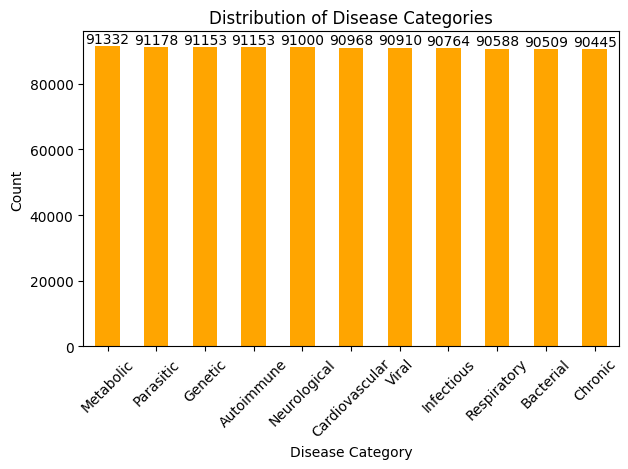

In [19]:
# Distribución de Enfermedades
disease_counts = df['Disease Category'].value_counts()
ax = disease_counts.plot(kind='bar', title='Distribution of Disease Categories', color='orange')
for i, value in enumerate(disease_counts):
    plt.text(i, value + 100, str(value), ha='center', va='bottom', fontsize=10)
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.tight_layout()     
plt.show()

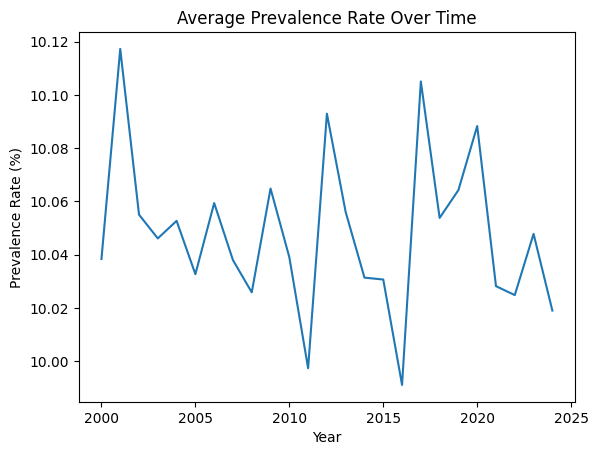

In [12]:
# Análisis Temporal
yearly_trend = df.groupby('Year')['Prevalence Rate (%)'].mean()
yearly_trend.plot(kind='line', title='Average Prevalence Rate Over Time')
plt.ylabel('Prevalence Rate (%)')
plt.show()

In [14]:
import seaborn as sns

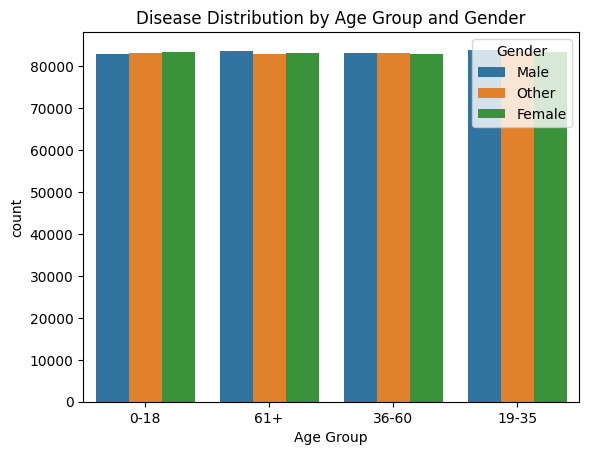

In [15]:
# Distribución por Edad y Género
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title('Disease Distribution by Age Group and Gender')
plt.show()

In [21]:
# Filtrar variables categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
# Filtrar variables numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Variables Categóricas:")
print(categorical_columns)
print("\nVariables Numéricas:")
print(numerical_columns)

Variables Categóricas:
Index(['Country', 'Disease Name', 'Disease Category', 'Age Group', 'Gender',
       'Treatment Type', 'Availability of Vaccines/Treatment'],
      dtype='object')

Variables Numéricas:
Index(['Year', 'Prevalence Rate (%)', 'Incidence Rate (%)',
       'Mortality Rate (%)', 'Population Affected', 'Healthcare Access (%)',
       'Doctors per 1000', 'Hospital Beds per 1000',
       'Average Treatment Cost (USD)', 'Recovery Rate (%)', 'DALYs',
       'Improvement in 5 Years (%)', 'Per Capita Income (USD)',
       'Education Index', 'Urbanization Rate (%)'],
      dtype='object')


In [22]:
# Clasificación de variables categóricas
import pandas.api.types as ptypes

# Separar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

ordinal_columns = []
nominal_columns = []

# Identificar si una variable categórica tiene un orden definido
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")
    # Preguntar manualmente si tiene orden
    is_ordinal = input(f"¿La columna '{col}' es ordinal? (sí/no): ").strip().lower()
    if is_ordinal == 'sí':
        ordinal_columns.append(col)
    else:
        nominal_columns.append(col)

print("\nVariables Ordinales:", ordinal_columns)
print("Variables Nominales:", nominal_columns)

Country: ['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']
Disease Name: ['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']
Disease Category: ['Respiratory' 'Parasitic' 'Genetic' 'Autoimmune' 'Bacterial'
 'Cardiovascular' 'Neurological' 'Chronic' 'Metabolic' 'Infectious'
 'Viral']
Age Group: ['0-18' '61+' '36-60' '19-35']
Gender: ['Male' 'Other' 'Female']
Treatment Type: ['Medication' 'Surgery' 'Vaccination' 'Therapy']
Availability of Vaccines/Treatment: ['No' 'Yes']

Variables Ordinales: []
Variables Nominales: ['Country', 'Disease Name', 'Disease Category', 'Age Group', 'Gender', 'Treatment Type', 'Availability of Vaccines/Treatment']


In [24]:
# Reclasificación Variable Age
df['Age Group'] = pd.Categorical(df['Age Group'], categories=['0-18', '19-35', '36-60', '61+'], ordered=True)

In [23]:
# Clasificación de Variables Numéricas
# Separar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

discrete_columns = []
continuous_columns = []

# Evaluar cada variable numérica
for col in numerical_columns:
    if df[col].dtype == 'int64':  # Variables enteras son candidatas a discretas
        discrete_columns.append(col)
    elif df[col].dtype == 'float64':  # Variables con decimales son continuas
        continuous_columns.append(col)
    else:
        # Revisar si valores únicos son pequeños, entonces es discreta
        if df[col].nunique() < 20:
            discrete_columns.append(col)
        else:
            continuous_columns.append(col)

print("\nVariables Numéricas Discretas:", discrete_columns)
print("Variables Numéricas Continuas:", continuous_columns)


Variables Numéricas Discretas: ['Year', 'Population Affected', 'Average Treatment Cost (USD)', 'DALYs', 'Per Capita Income (USD)']
Variables Numéricas Continuas: ['Prevalence Rate (%)', 'Incidence Rate (%)', 'Mortality Rate (%)', 'Healthcare Access (%)', 'Doctors per 1000', 'Hospital Beds per 1000', 'Recovery Rate (%)', 'Improvement in 5 Years (%)', 'Education Index', 'Urbanization Rate (%)']



--- Análisis de la columna: 'Country' ---
Valores únicos (20): ['Italy' 'France' 'Turkey' 'Indonesia' 'Saudi Arabia' 'USA' 'Nigeria'
 'Australia' 'Canada' 'Mexico' 'China' 'South Africa' 'Japan' 'UK'
 'Russia' 'Brazil' 'Germany' 'India' 'Argentina' 'South Korea']
Valores nulos: 0

Frecuencia de valores:
Country
Russia          50532
South Africa    50408
South Korea     50181
Germany         50176
UK              50125
Canada          50114
Mexico          50080
China           50066
Nigeria         50046
Saudi Arabia    49958
Australia       49953
France          49943
USA             49913
Turkey          49901
Italy           49839
Argentina       49798
Japan           49764
India           49760
Indonesia       49756
Brazil          49687
Name: count, dtype: int64
--------------------------------------------------


C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\2154149450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


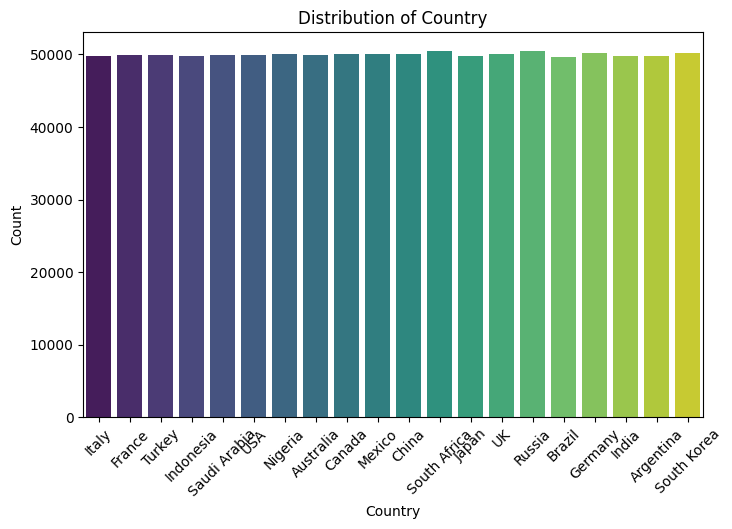


--- Análisis de la columna: 'Disease Name' ---
Valores únicos (20): ['Malaria' 'Ebola' 'COVID-19' "Parkinson's Disease" 'Tuberculosis'
 'Dengue' 'Rabies' 'Cholera' 'Leprosy' 'Cancer' 'Diabetes' 'Measles'
 'Zika' "Alzheimer's Disease" 'Polio' 'Hypertension' 'Asthma' 'HIV/AIDS'
 'Influenza' 'Hepatitis']
Valores nulos: 0

Frecuencia de valores:
Disease Name
COVID-19               50404
Zika                   50313
Dengue                 50289
Cancer                 50285
HIV/AIDS               50274
Cholera                50249
Asthma                 50122
Leprosy                50064
Diabetes               50020
Rabies                 49975
Hepatitis              49970
Polio                  49956
Malaria                49948
Influenza              49919
Tuberculosis           49862
Alzheimer's Disease    49823
Measles                49736
Parkinson's Disease    49708
Ebola                  49692
Hypertension           49391
Name: count, dtype: int64
------------------------------------

C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\2154149450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


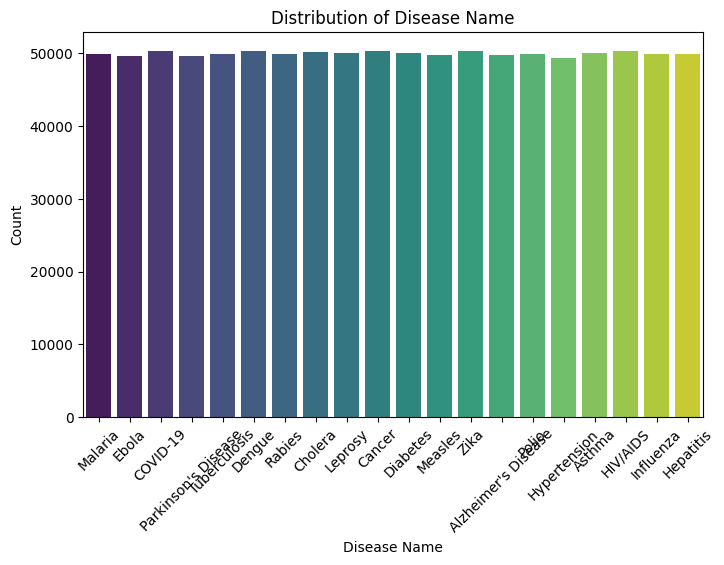


--- Análisis de la columna: 'Disease Category' ---
Valores únicos (11): ['Respiratory' 'Parasitic' 'Genetic' 'Autoimmune' 'Bacterial'
 'Cardiovascular' 'Neurological' 'Chronic' 'Metabolic' 'Infectious'
 'Viral']
Valores nulos: 0

Frecuencia de valores:
Disease Category
Metabolic         91332
Parasitic         91178
Genetic           91153
Autoimmune        91153
Neurological      91000
Cardiovascular    90968
Viral             90910
Infectious        90764
Respiratory       90588
Bacterial         90509
Chronic           90445
Name: count, dtype: int64
--------------------------------------------------


C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\2154149450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


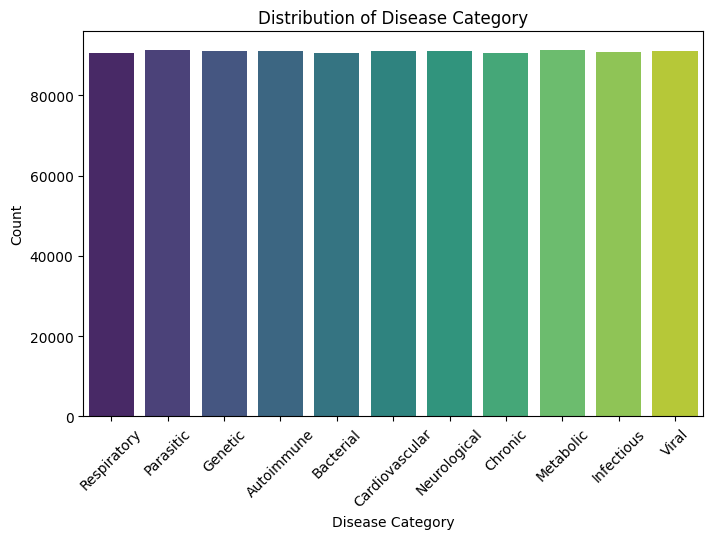


--- Análisis de la columna: 'Age Group' ---
Valores únicos (4): ['0-18', '61+', '36-60', '19-35']
Categories (4, object): ['0-18' < '19-35' < '36-60' < '61+']
Valores nulos: 0

Frecuencia de valores:
Age Group
19-35    251201
61+      249989
0-18     249605
36-60    249205
Name: count, dtype: int64
--------------------------------------------------


C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\2154149450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


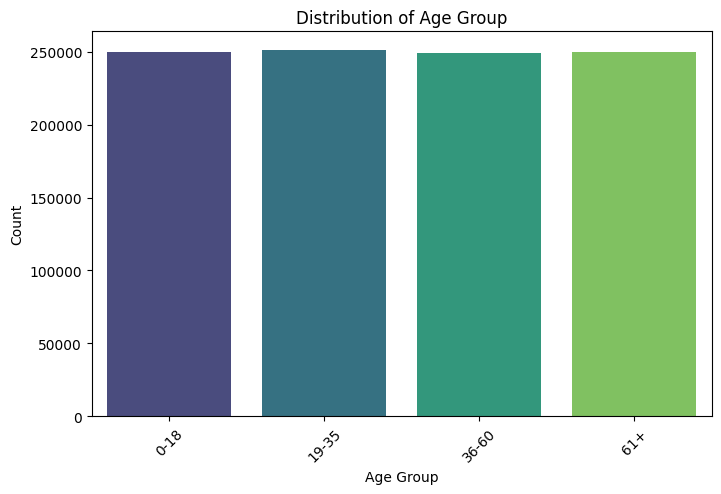


--- Análisis de la columna: 'Gender' ---
Valores únicos (3): ['Male' 'Other' 'Female']
Valores nulos: 0

Frecuencia de valores:
Gender
Male      333676
Female    333223
Other     333101
Name: count, dtype: int64
--------------------------------------------------


C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\2154149450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


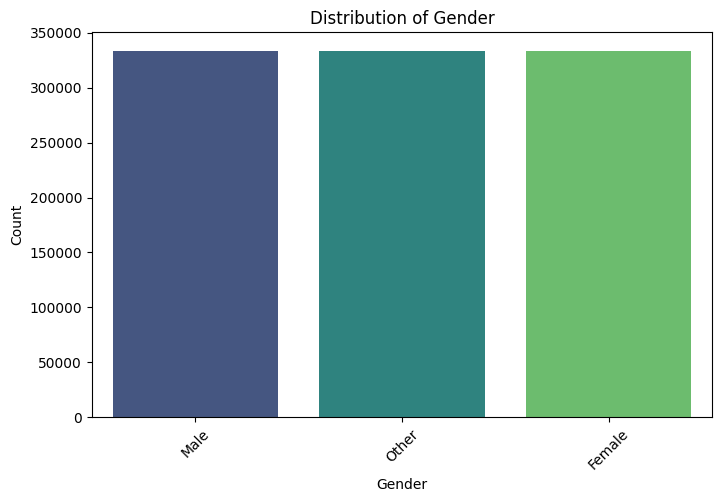


--- Análisis de la columna: 'Treatment Type' ---
Valores únicos (4): ['Medication' 'Surgery' 'Vaccination' 'Therapy']
Valores nulos: 0

Frecuencia de valores:
Treatment Type
Surgery        250528
Therapy        250263
Vaccination    249753
Medication     249456
Name: count, dtype: int64
--------------------------------------------------


C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\2154149450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


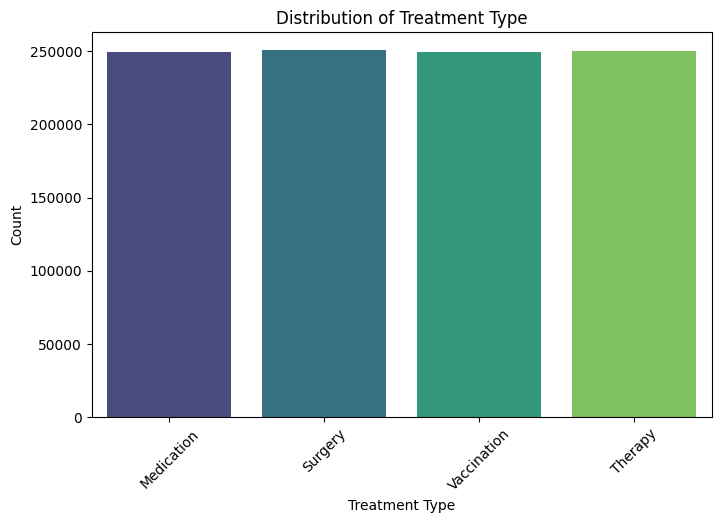


--- Análisis de la columna: 'Availability of Vaccines/Treatment' ---
Valores únicos (2): ['No' 'Yes']
Valores nulos: 0

Frecuencia de valores:
Availability of Vaccines/Treatment
Yes    500354
No     499646
Name: count, dtype: int64
--------------------------------------------------


C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\2154149450.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')


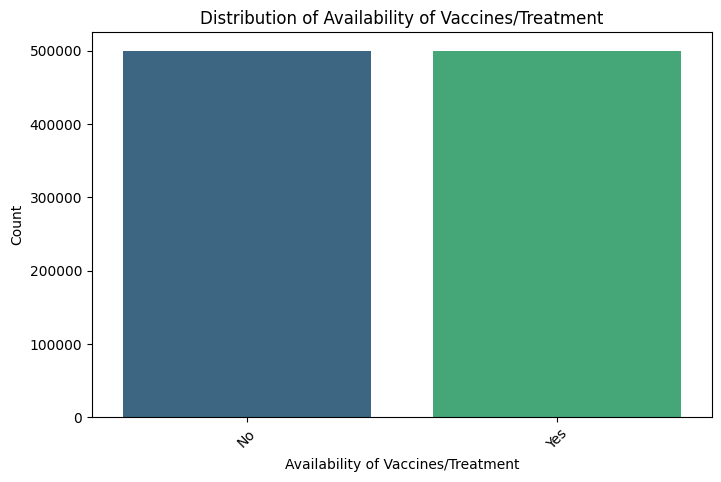


Resumen general de variables categóricas:
        Country Disease Name Disease Category   Gender Treatment Type  \
count   1000000      1000000          1000000  1000000        1000000   
unique       20           20               11        3              4   
top      Russia     COVID-19        Metabolic     Male        Surgery   
freq      50532        50404            91332   333676         250528   

       Availability of Vaccines/Treatment  
count                             1000000  
unique                                  2  
top                                   Yes  
freq                               500354  


In [25]:
# Identificar los valores únicos
# Lista de columnas categóricas
categorical_columns = ['Country', 'Disease Name', 'Disease Category', 
                       'Age Group', 'Gender', 'Treatment Type', 
                       'Availability of Vaccines/Treatment']

# Exploración de variables categóricas
for col in categorical_columns:
    print(f"\n--- Análisis de la columna: '{col}' ---")
    print(f"Valores únicos ({len(df[col].unique())}): {df[col].unique()}")
    print(f"Valores nulos: {df[col].isnull().sum()}")
    print("\nFrecuencia de valores:")
    print(df[col].value_counts())
    print("-" * 50)
    
    # Visualización de la distribución
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
    plt.show()

# Resumen general de todas las variables categóricas
print("\nResumen general de variables categóricas:")
print(df[categorical_columns].describe(include='object'))

In [26]:
# Determinar la enfermedad más común en cada país
most_common_disease = (
    df.groupby(['Country', 'Disease Name'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Country', 'Count'], ascending=[True, False])
    .drop_duplicates('Country', keep='first')
)

# Mostrar los resultados
print(most_common_disease[['Country', 'Disease Name', 'Count']])

          Country  Disease Name  Count
2       Argentina      COVID-19   2600
23      Australia        Cancer   2592
59         Brazil          Zika   2568
76         Canada         Polio   2604
92          China       Leprosy   2598
103        France        Cancer   2585
123       Germany        Cancer   2633
158         India  Tuberculosis   2595
173     Indonesia       Malaria   2557
196         Italy         Polio   2570
208         Japan      HIV/AIDS   2611
224        Mexico       Cholera   2600
259       Nigeria          Zika   2581
269        Russia     Hepatitis   2700
281  Saudi Arabia        Asthma   2577
307  South Africa         Ebola   2630
322   South Korea      COVID-19   2626
357        Turkey        Rabies   2590
362            UK      COVID-19   2610
392           USA       Leprosy   2587


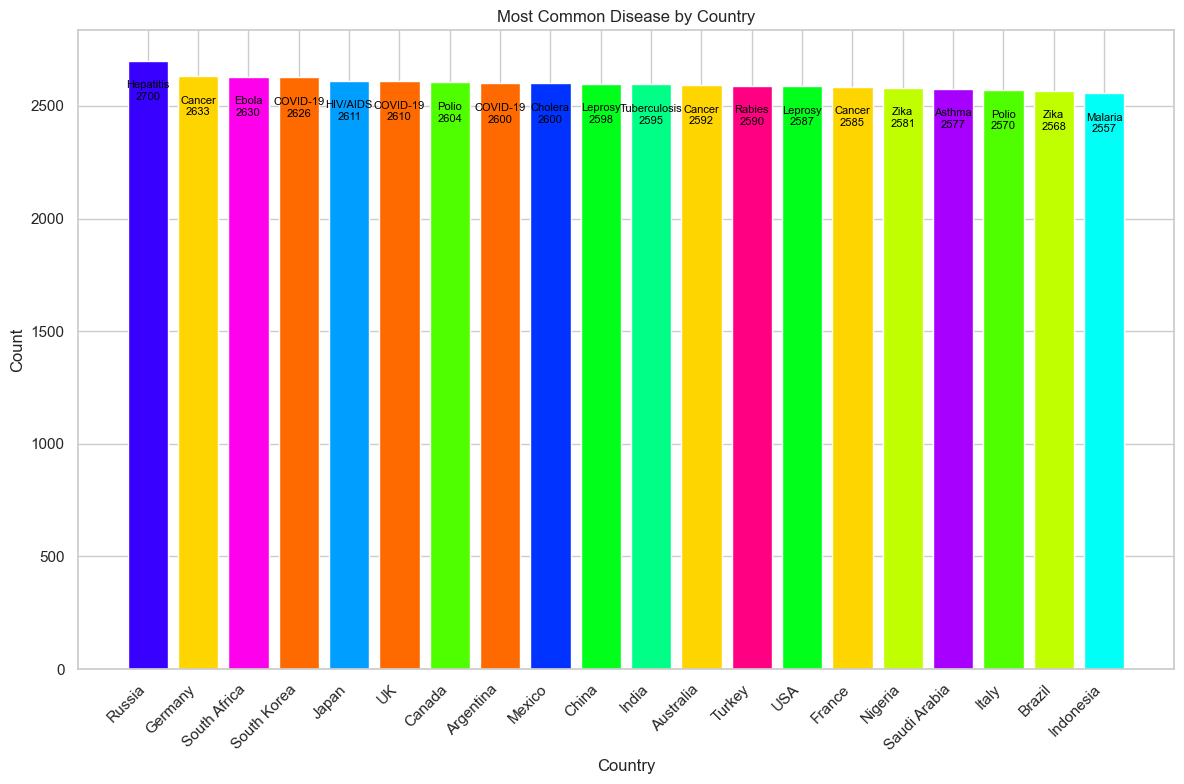

In [30]:
# Gráfico del conteo de enfermedad por país
# Configuración del estilo
sns.set(style="whitegrid")

# Asignar colores únicos a cada enfermedad
unique_diseases = most_common_disease['Disease Name'].unique()
color_palette = sns.color_palette('hsv', len(unique_diseases))
color_dict = dict(zip(unique_diseases, color_palette))

# Ordenar datos por el valor de 'Count' descendente
most_common_disease_sorted = most_common_disease.sort_values(by='Count', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(most_common_disease_sorted['Country'],
               most_common_disease_sorted['Count'],
               color=[color_dict[disease] for disease in most_common_disease_sorted['Disease Name']])

# Etiquetas dentro de cada columna (conteo y nombre de la enfermedad)
for bar, count, disease in zip(bars, most_common_disease_sorted['Count'], most_common_disease_sorted['Disease Name']):
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posición horizontal centrada
             bar.get_height() - (0.05 * max(most_common_disease_sorted['Count'])),  # Posición vertical ajustada
             f"{disease}\n{count}",  # Texto con nombre de la enfermedad y conteo
             ha='center', va='center', fontsize=8, color='black')

# Personalización del gráfico
plt.title("Most Common Disease by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje X para mejor visualización
plt.tight_layout()

# Mostrar el gráfico
plt.show()

C:\Users\cafef\AppData\Local\Temp\ipykernel_33888\1355737981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


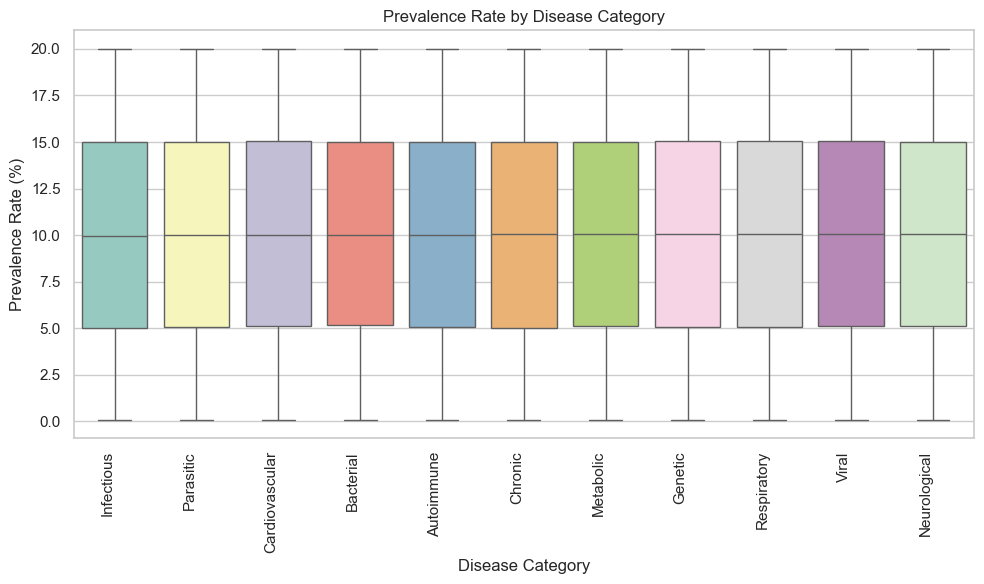

In [37]:
# Comparar la distribución de la tasa de prevalencia (Prevalence Rate (%))
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Disease Category', 
    y='Prevalence Rate (%)', 
    data=df, 
    palette='Set3', 
    order=df.groupby('Disease Category')['Prevalence Rate (%)'].median().sort_values().index    # Ordenamos por la mediana para la robustez frente a valores atípicos
)
plt.xticks(rotation=90, ha='right')  
plt.title('Prevalence Rate by Disease Category')
plt.xlabel('Disease Category')
plt.ylabel('Prevalence Rate (%)')
plt.tight_layout()
plt.show()

- Las cajas y las líneas parecen tener una distribución simétrica, lo que sugiere que los datos no están sesgados hacia valores más bajos o más altos en ninguna categoría de enfermedad.
- Todas las categorías de enfermedades tienen un rango similar, con valores mínimos cercanos a 0% y máximos cercanos a 20%.
- Las tasas de prevalencia son similares en todas las categorías de enfermedades tanto en su mediana como en su variabilidad.
- No hay grandes diferencias entre las categorías, lo que sugiere que, a nivel global, ninguna categoría de enfermedad domina claramente en términos de prevalencia.

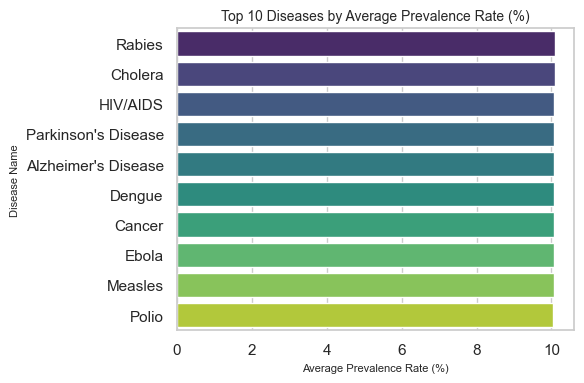

In [ ]:
# Identificar y visualizar las 10 enfermedades con mayor tasa de prevalencia Prevalence Rate (%)
plt.figure(figsize=(6, 4))
top_diseases = (
    df.groupby('Disease Name')['Prevalence Rate (%)']
    .mean()
    .nlargest(10)
)

sns.barplot(
    x=top_diseases.values, 
    y=top_diseases.index, 
    hue=top_diseases.index,  
    palette='viridis',
    legend=False  
)

plt.title('Top 10 Diseases by Average Prevalence Rate (%)', fontsize=10)
plt.xlabel('Average Prevalence Rate (%)', fontsize=8)
plt.ylabel('Disease Name', fontsize=8)
plt.tight_layout()
plt.show()


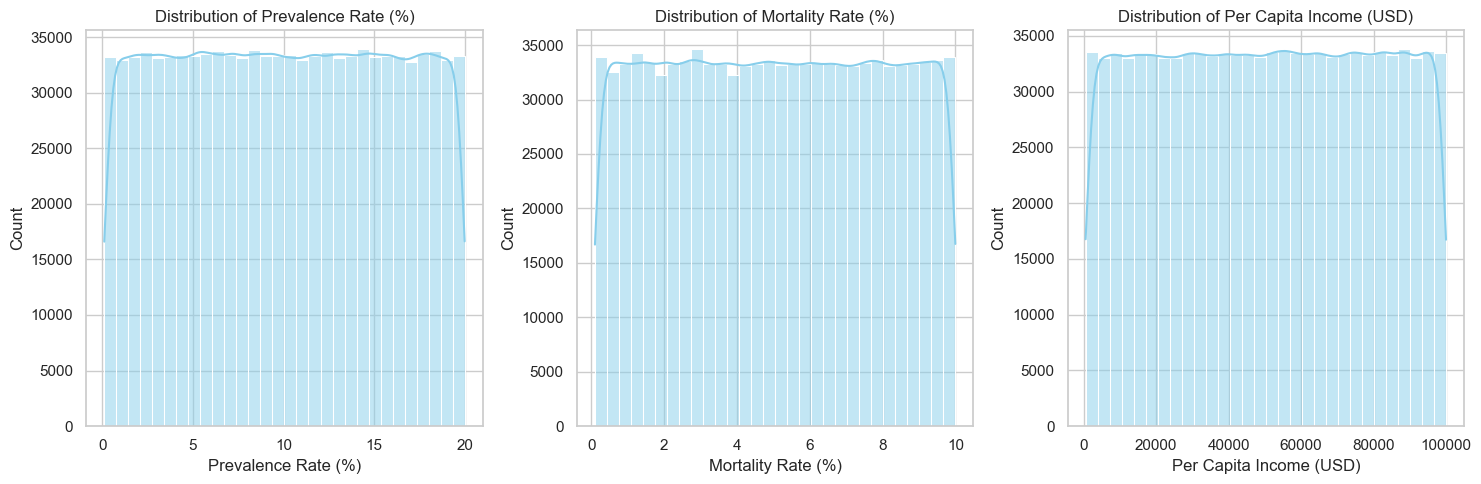

In [ ]:
# Distribuciones de columnas numéricas clave usando histogramas
numeric_columns = ['Prevalence Rate (%)', 'Mortality Rate (%)', 'Per Capita Income (USD)']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)  # Crear subgráficos en una fila
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

- Distribución de Prevalence Rate (%): No hay un rango específico con mayor concentración de valores, lo que sugiere que las enfermedades consideradas afectan a la población con una prevalencia similar en general. (Se deberían verificar la calidad de los datos)
- Distribución de Mortality Rate (%): No hay picos significativos en tasas de mortalidad específicas, tendiendo a ser uniformemente bajas, lo que implica que el impacto de las enfermedades es moderado en términos de mortalidad. (Se debería verificar la calidad de los datos)
- Distribución de Per Capita Income (USD): No hay concentración significativa de ingresos en rangos bajos o altos, esto sugiere que los datos podrían haber sido generados o distribuidos sintéticamente, ya que en datos reales, los ingresos suelen presentar asimetría (distribución sesgada a la derecha).

Conclusiones Generales:
1. Las distribuciones uniformes en las tres variables clave indican que no hay una concentración específica en rangos particulares.
2. En datos reales, es común encontrar Distribuciones asimétricas en variables como ingresos (concentración en valores bajos) y Distribuciones más concentradas en valores intermedios o bajos para tasas de prevalencia y mortalidad.
3. Estas distribuciones sugieren que el dataset podría ser sintético o preprocesado de manera uniforme (sesgado).
4. Se debe analizar si los datos reflejan comportamientos reales o si necesitan ajustes para representar patrones más naturales.

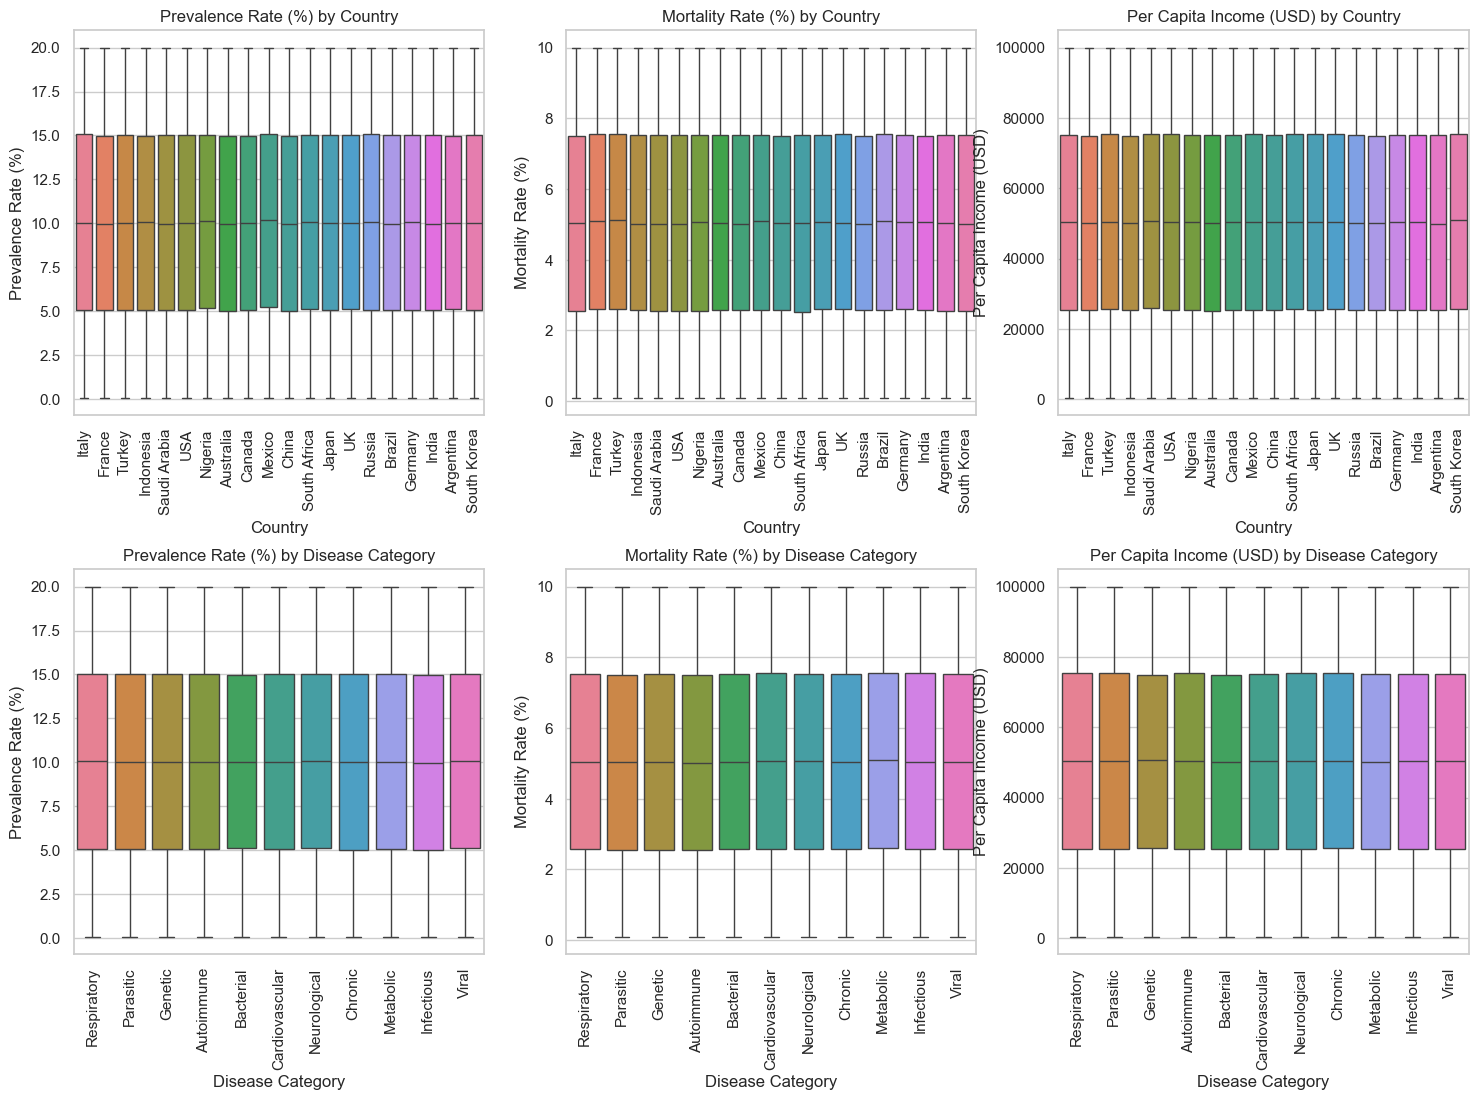

In [46]:
# Segementación por País o Enfermedad
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4)

def plot_boxplot(ax, x, y, title):
    sns.boxplot(data=df, x=x, y=y, ax=ax, hue=x, legend=False)
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=90)

# Graficar cada boxplot
plot_boxplot(axes[0, 0], 'Country', 'Prevalence Rate (%)', "Prevalence Rate (%) by Country")
plot_boxplot(axes[0, 1], 'Country', 'Mortality Rate (%)', "Mortality Rate (%) by Country")
plot_boxplot(axes[0, 2], 'Country', 'Per Capita Income (USD)', "Per Capita Income (USD) by Country")
plot_boxplot(axes[1, 0], 'Disease Category', 'Prevalence Rate (%)', "Prevalence Rate (%) by Disease Category")
plot_boxplot(axes[1, 1], 'Disease Category', 'Mortality Rate (%)', "Mortality Rate (%) by Disease Category")
plot_boxplot(axes[1, 2], 'Disease Category', 'Per Capita Income (USD)', "Per Capita Income (USD) by Disease Category")

plt.show()

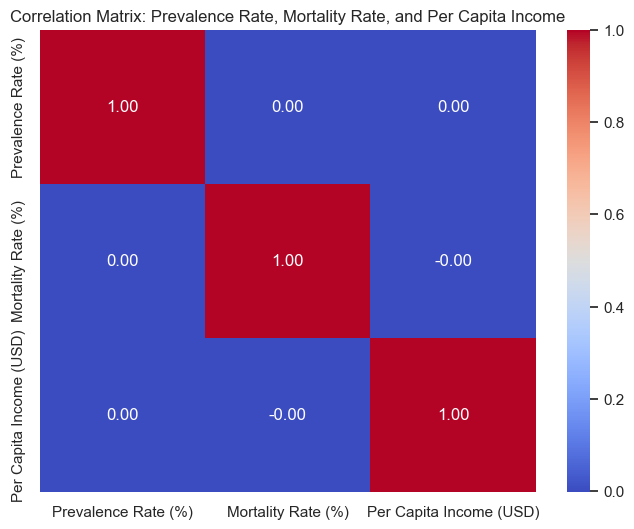

In [47]:
# Explorar Correlaciones
correlation_vars = ['Prevalence Rate (%)', 'Mortality Rate (%)', 'Per Capita Income (USD)']

# Calcular la matriz de correlación
correlation_matrix = df[correlation_vars].corr()

# Heatmap de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Prevalence Rate, Mortality Rate, and Per Capita Income")
plt.show()

# Conclusión Principal
- Los datos parecen ficticios o generados de manera aleatoria, ya que es muy poco probable encontrar correlaciones exactamente 0 en datos del mundo real.
- Generalmente, entre variables como tasas de mortalidad y Prevalence Rate (%), debería existir cierta correlación positiva (mayor prevalencia tiende a asociarse con mayor mortalidad).
- De igual forma, entre Per Capita Income y tasas de mortalidad, se suele observar correlación negativa: mayores ingresos per cápita se asocian con menores tasas de mortalidad.